In [1]:
#Importando bibliotecas

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics


import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Carregando os dados

data = pd.read_csv("character-predictions.csv") #Realiza leitura do arquivo
data.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [4]:
#Verificando a quantidade de colunas e linhas

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [5]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending = False)

isAliveMother        98.920863
mother               98.920863
isAliveHeir          98.818088
heir                 98.818088
isAliveFather        98.663926
father               98.663926
isAliveSpouse        85.817061
spouse               85.817061
age                  77.749229
dateOfBirth          77.749229
DateoFdeath          77.183967
culture              65.210689
title                51.798561
house                21.942446
plod                  0.000000
name                  0.000000
alive                 0.000000
pred                  0.000000
male                  0.000000
actual                0.000000
isAlive               0.000000
book1                 0.000000
popularity            0.000000
book2                 0.000000
book3                 0.000000
book4                 0.000000
book5                 0.000000
isMarried             0.000000
isNoble               0.000000
numDeadRelations      0.000000
boolDeadRelations     0.000000
isPopular             0.000000
S.No    

In [6]:
data.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(data['age'].mean())

-1293.5635103926097


In [8]:
print(data['name'][data['age'] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object


In [9]:
data.loc[1684, "age"] = 25.0
data.loc[1868, "age"] = 0.0

In [10]:
print(data['age'].mean())

36.70438799076212


In [11]:
data['age'].fillna(data['age'].mean(), inplace = True)
data['culture'].fillna("", inplace = True)

data.fillna(-1, inplace = True)

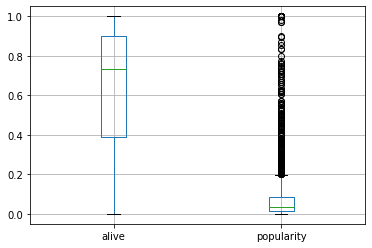

In [12]:
data.boxplot(['alive','popularity'])

In [13]:
data.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [15]:
drop = ['S.No', 'pred','alive','name','isAlive','DateoFdeath']

In [16]:
data_2 = data.drop(drop, inplace = True, axis = 1)

In [17]:
data_2 = pd.get_dummies(data)

In [18]:
data_2.drop("plod", inplace = True, axis = 1)

In [19]:
data_2.shape

(1946, 1012)

In [20]:
x = data_2.iloc[:,1:].values
y = data_2.iloc[:, 0].values

In [21]:
#Separando os dados para a vailidação cruzada

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [22]:
kfold.get_n_splits()

5

In [23]:
modelo = [LogisticRegression(solver = 'liblinear'),RandomForestClassifier(n_estimators=400, random_state=42), DecisionTreeClassifier(random_state = 42),SVC(kernel='linear',gamma='scale',random_state=42),KNeighborsClassifier()]

In [26]:
mean = []
std = []

for model in modelo:
  result = cross_val_score(model, x,y, cv = kfold, scoring = 'accuracy',n_jobs = -1)
  mean.append(result)
  std.append(result)

In [27]:
mean

[array([0.7974359 , 0.75064267, 0.77120823, 0.78663239, 0.80462725]),
 array([0.81794872, 0.81491003, 0.82005141, 0.8277635 , 0.8277635 ]),
 array([0.80512821, 0.80462725, 0.79948586, 0.76863753, 0.80462725]),
 array([0.76923077, 0.72750643, 0.75835476, 0.79177378, 0.781491  ]),
 array([0.83076923, 0.82005141, 0.82262211, 0.85347044, 0.8277635 ])]

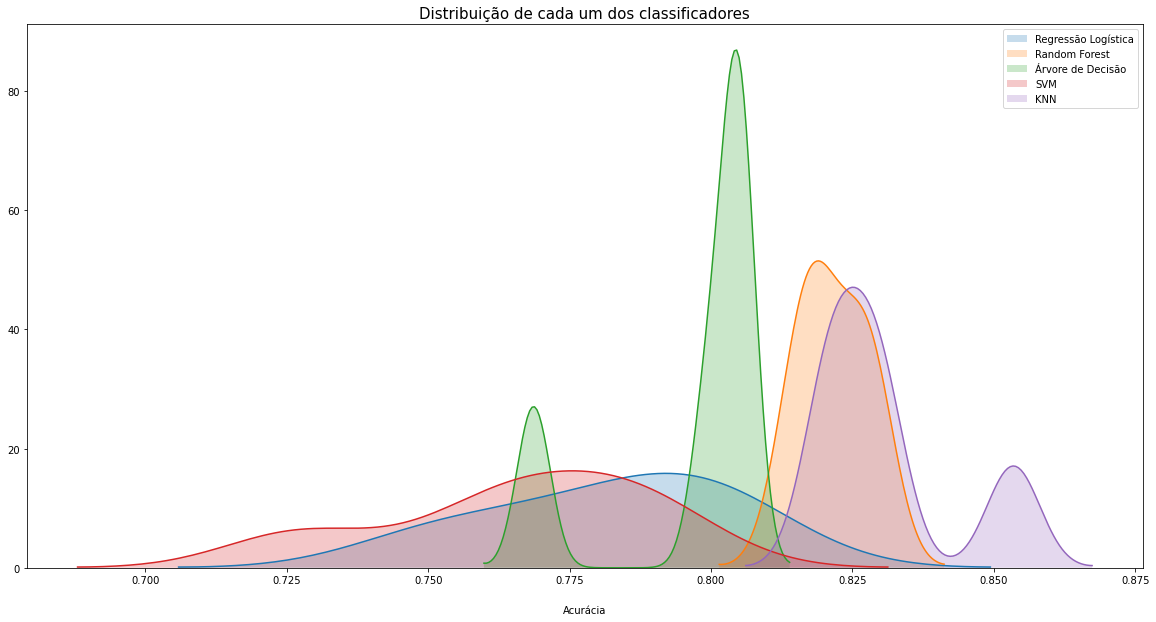

In [28]:
classificadores = ['Regressão Logística','Random Forest','Árvore de Decisão','SVM','KNN']

plt.figure(figsize = (20,10))

for i in range(len(mean)):
  sns.distplot(mean[i], hist = False, kde_kws={'shade':True})

plt.title("Distribuição de cada um dos classificadores", fontsize = 15)
plt.legend(classificadores)
plt.xlabel("Acurácia", labelpad = 20)
plt.show()

# QUAL MODELO É MELHOR PARA SER UTILIZADO?

In [77]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = 42, shuffle = True)

In [81]:
#SVM e RandomForest

svm_clf = SVC(C = 0.9, gamma = 0.1, kernel = 'linear',probability = True, random_state = 42)
rf_clf = RandomForestClassifier(n_estimators=400,n_jobs = -1, random_state = 42)

In [82]:
svm_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [84]:
y_pred_svm = svm_clf.predict_proba(X_test)
y_pred_rf = rf_clf.predict_proba(X_test)

In [94]:
svm_proba = np.argmax(y_pred_svm, axis = 1)
rf_pred = np.argmax(y_pred_rf, axis = 1)

In [102]:
cm = metrics.confusion_matrix(y_test, svm_proba)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm2 = metrics.confusion_matrix(y_test,rf_pred)
cm2 = cm2.astype('float')/cm2.sum(axis = 1)[:, np.newaxis]

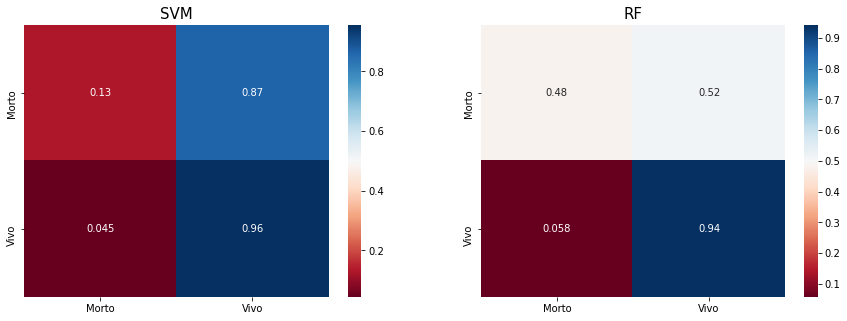

In [106]:
classes = ['Morto','Vivo']

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].set_title("SVM", fontsize = 15)
sns.heatmap(pd.DataFrame(cm, index = classes, columns = classes), cmap = 'RdBu', annot = True, ax = ax[0])
ax[1].set_title("RF", fontsize = 15)
sns.heatmap(pd.DataFrame(cm2, index = classes, columns = classes), cmap = "RdBu", annot = True, ax = ax[1])